## 의사결정나무 (시각화)
     

> https://graphviz.org/download/



In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from IPython.display import Image
import pydot
import pydotplus

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

import pandas as pd
import numpy as np
import os

ModuleNotFoundError: No module named 'graphviz'

__[예제 2.]__   
iris 데이터의 Species를 분류하는 의사결정나무 분석을 실시하고 오분류표를 만들어보자

In [2]:
# 데이터 준비
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
# 훈련셋 평가셋 분리하기
train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y, train_size=0.7,
                                                   test_size = 0.3, random_state=123)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(105, 4) (45, 4) (105,) (45,)


In [8]:
# 의사결정나무 모델 실행
iris_clf = DecisionTreeClassifier(max_depth=5)
iris_clf = iris_clf.fit(train_x, train_y)
iris_prediction = iris_clf.predict(test_x)

In [9]:
feature_columns = iris.feature_names

In [10]:
feature_columns

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

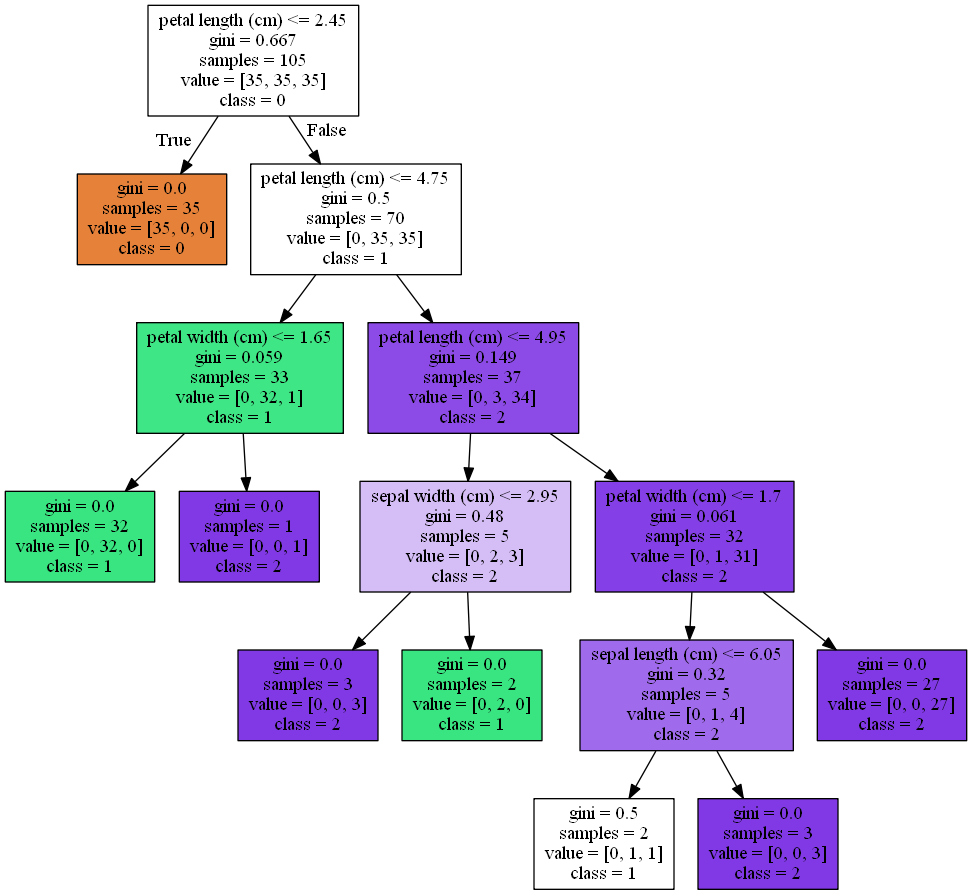

In [22]:
from sklearn import tree
# 의사결정나무 시각화

# 시각화 라이브러리에 삽입해야하는 변수 생성하기
# 원본 데이터의 변수이름을 추출하고, 타겟변수 이름을 0, 1로 설정
feature_names = feature_columns
target_name = np.array(['0', '1', '2'])
#print(target_name) #결과 ['0', '1', '2']

# Graphviz로 의사결정나무 시각화하기
dt_dot_data = tree.export_graphviz(iris_clf, feature_names=feature_names, class_names=target_name, 
                            filled=True,max_depth= 5)
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

Image(dt_graph.create_png())

In [23]:
# 분류 리포트 생성하기
class_report_iris = classification_report(test_y, iris_prediction)
print(class_report_iris)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.86      0.80      0.83        15
           2       0.81      0.87      0.84        15

    accuracy                           0.89        45
   macro avg       0.89      0.89      0.89        45
weighted avg       0.89      0.89      0.89        45



In [24]:
from sklearn.metrics import roc_auc_score

In [25]:
test_y

array([1, 2, 1, 1, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 1, 0, 2, 2, 0, 0, 0, 0,
       0, 1, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 2, 1, 1, 2,
       1])

In [26]:
iris_prediction

array([2, 2, 1, 1, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 1, 0, 2, 2, 0, 0, 0, 0,
       0, 1, 0, 1, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 0, 2, 1, 1, 2,
       1])

In [27]:
iris_clf.predict_proba(test_x)

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [ ]:
help(roc_auc_score)

In [29]:
roc_auc_score(test_y, iris_clf.predict_proba(test_x), multi_class='ovr')

0.9166666666666666